In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_columns = None

In [39]:
titanic_df = pd.read_csv(r"C:\Users\Hp\Downloads/Titanic-Dataset.csv")


In [40]:
age_imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = age_imputer.fit_transform(titanic_df[['Age']])

In [41]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
titanic_df=titanic_df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

In [45]:
titanic_df=titanic_df.dropna(subset='Embarked')
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [47]:
titanic_df['Survived'].sum()

340

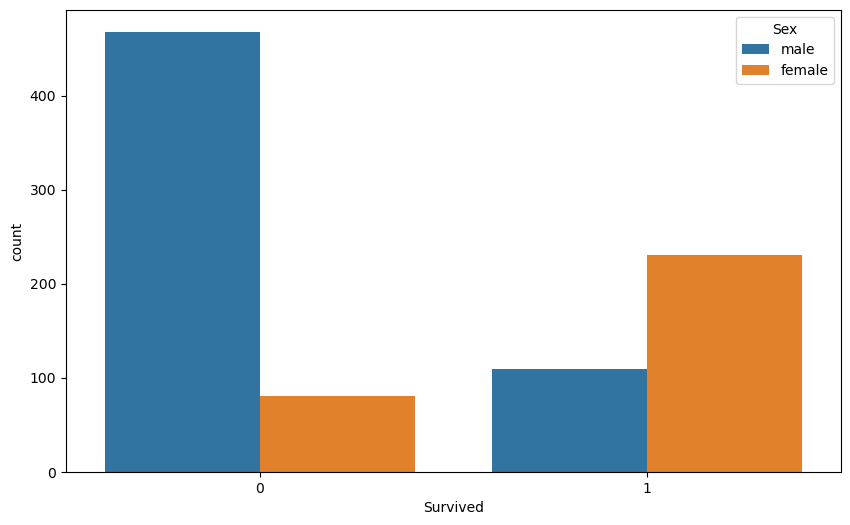

In [48]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='Survived', hue='Sex', data=titanic_df)

In [50]:
corr_df=pd.get_dummies(titanic_df, drop_first=True)
corr_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,0.086506,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
Sex_male,-0.541585,0.127741,0.086506,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Embarked_Q,0.004536,0.220558,-0.030436,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,-0.008964,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


<Axes: >

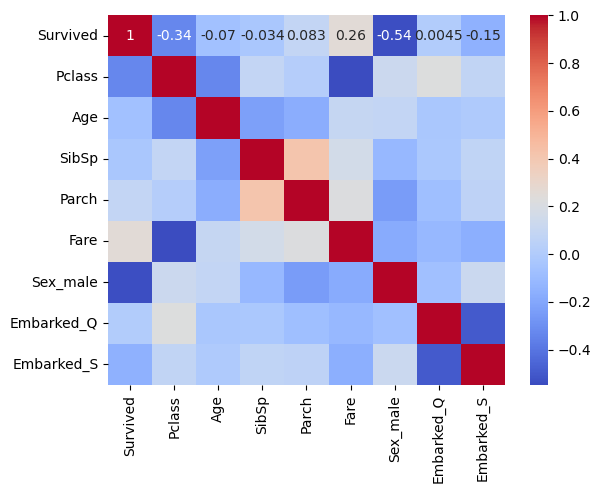

In [51]:
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import confusion_matrix,classification_report
X=pd.get_dummies(titanic_df.drop('Survived', axis=1), drop_first=True)
y=titanic_df['Survived']
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = RandomForestClassifier(n_estimators=10,max_features=10,random_state=101)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=10, random_state=101)

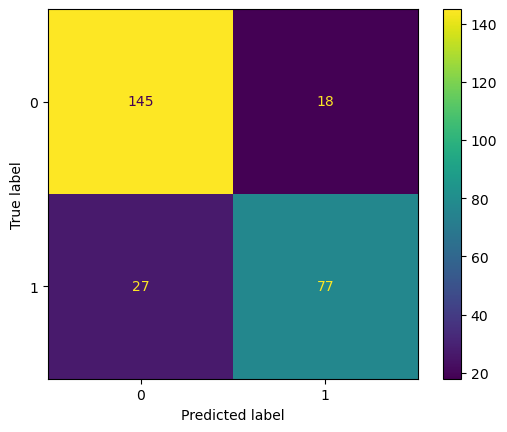

In [55]:
preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       163
           1       0.81      0.74      0.77       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [57]:
features=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
features.sort_values(by='Feature Importance')

,Feature Importance
Embarked_Q,0.006860
Embarked_S,0.023937
Parch,0.024834
SibSp,0.045094
Pclass,0.105184
Fare,0.235569
Age,0.259200
Sex_male,0.299323


In [58]:
from sklearn.model_selection import GridSearchCV
n_estimators=[20,40,60,80]
max_features= [4,5,6]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)
grid.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
  

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [4, 5, 6],
                         'n_estimators': [20, 40, 60, 80],
                         'oob_score': [True, False]})

In [59]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 80, 'oob_score': True}

In [60]:
predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       163
           1       0.78      0.73      0.76       104

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



In [61]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid2 = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid2)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [62]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [63]:
predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.81      0.71      0.76       104

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



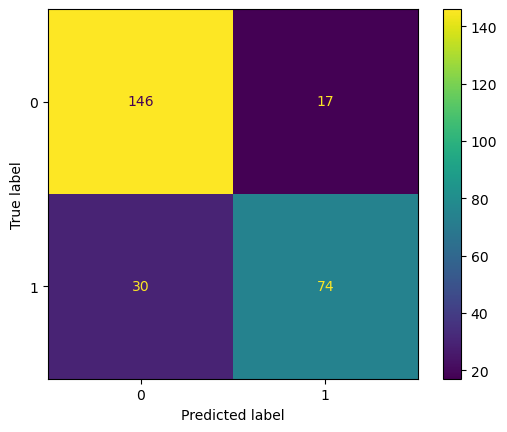

In [64]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()